In [1]:
# !pip install -U imbalanced-learn

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("dark")
from imblearn.over_sampling import SMOTE
# from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.preprocessing import FunctionTransformer
from scipy.stats import probplot

ModuleNotFoundError: No module named 'imblearn'

In [2]:
def drop_columns(df,col_list):
    return df.drop(col_list,1)

In [3]:
def add_binary_col(df,col_orig_name,col_new_name,val):
    df['is'+col_new_name] = df[col_orig_name].apply(lambda row: 1 if row == val else 0)
    return df

In [4]:
data= pd.read_csv('data.csv')
# df = pd.read_csv('data.csv')

In [5]:
#removing for cols: 'nameOrig','nameDest'
non_numeric_cols = ['nameOrig','nameDest','Unnamed: 0']
data = drop_columns(data,non_numeric_cols)

In [6]:
# data.describe()

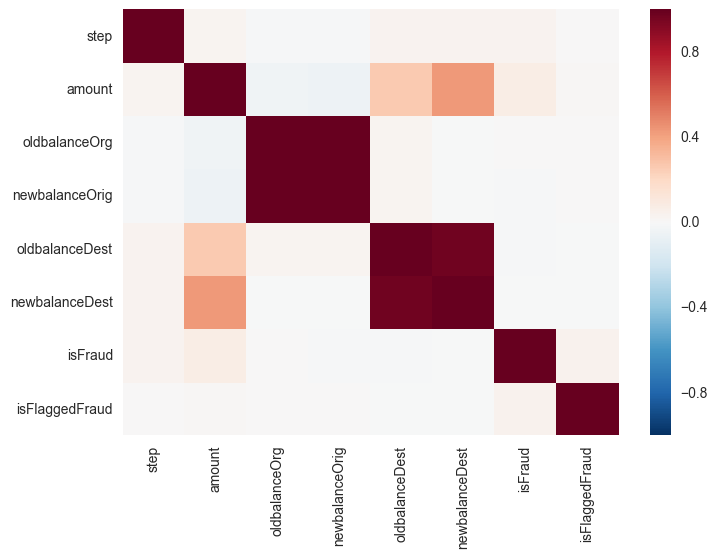

In [7]:
sns.heatmap(data.corr())

In [17]:
data_to_plot = drop_columns(data,['isFraud','isFlaggedFraud','step','type'])

In [18]:
data_to_plot.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,181.00,181.0,0.00,0.0,0.00
1,181.00,181.0,0.00,21182.0,0.00
2,5337.77,41720.0,36382.23,41898.0,40348.79
3,9644.94,4465.0,0.00,10845.0,157982.12
4,229133.94,15325.0,0.00,5083.0,51513.44


In [28]:
col_names = list(data_to_plot.columns.values)
transformer = FunctionTransformer(np.log1p)
tmp = transformer.transform(data_to_plot)
log_data_to_plot = pd.DataFrame(tmp,columns = col_names)
# g.fig.get_axes()[0].set_yscale('log')
# plt.show()

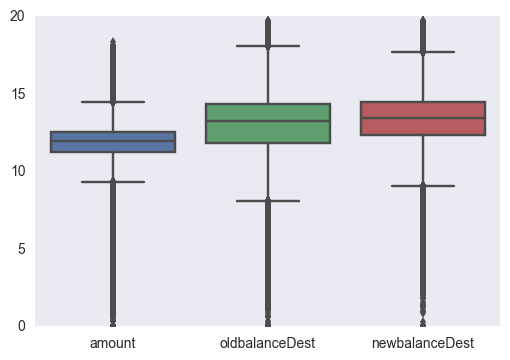

In [36]:
sns.boxplot(data=log_data_to_plot[['amount','oldbalanceDest','newbalanceDest']])

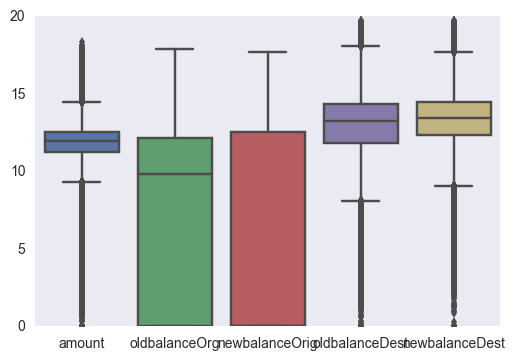

In [37]:
sns.boxplot(data=log_data_to_plot)

In [39]:
data[['oldbalanceOrg','newbalanceOrig']].describe()

,oldbalanceOrg,newbalanceOrig
count,4.211125e+06,4.211125e+06
mean,1.225068e+06,1.260404e+06
std,3.482978e+06,3.523174e+06
min,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00
50%,1.815500e+04,0.000000e+00
75%,1.911278e+05,2.849544e+05
max,5.958504e+07,4.958504e+07


In [41]:
rel_types = ['CASH_OUT','TRANSFER']

In [42]:
data = data[(data['type'] ==rel_types[0]) | (data['type'] ==rel_types[1]) ]

In [43]:
for type_col in rel_types:
    data = add_binary_col(data,'type',type_col,type_col)

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [44]:
data = drop_columns(data,'type')

In [45]:
y_col = 'isFraud'

In [46]:
X = drop_columns(data,y_col)

In [47]:
y = data[[y_col]]
y_new = y.as_matrix()

In [48]:
X.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,isCASH_OUT,isTRANSFER
0,1,181.00,181.0,0.0,0.0,0.00,0,0,1
1,1,181.00,181.0,0.0,21182.0,0.00,0,1,0
4,1,229133.94,15325.0,0.0,5083.0,51513.44,0,1,0
5,1,215310.30,705.0,0.0,22425.0,0.00,0,0,1
8,1,311685.89,10835.0,0.0,6267.0,2719172.89,0,0,1


In [142]:
######### multiple kinds

# kind = ['regular', 'borderline1', 'borderline2', 'svm']
# sm = [SMOTE(kind=k) for k in kind]
# X_resampled = []
# y_resampled = []
# X_res_vis = []
# for method in sm:
#     X_res, y_res = method.fit_sample(X, y_new)
#     X_resampled.append(X_res)
#     y_resampled.append(y_res)
#     X_res_vis.append(pca.transform(X_res))

In [49]:
sm = SMOTE(kind='regular')
X_res, y_res = sm.fit_sample(X,y_new)

C:\Anaconda2\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [50]:
# X.columns.values
col_names = list(X.columns.values)
print col_names

['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFlaggedFraud', 'isCASH_OUT', 'isTRANSFER']


In [51]:
#  X_res, y_res = sm.fit_sample(X, y_new)

In [52]:
new_pd = pd.DataFrame(X_res,columns=col_names)

In [53]:
new_pd[y_col] = pd.DataFrame(y_res)

In [54]:
train = new_pd.sample(frac=0.8,random_state=np.random.RandomState(3))
y_train = train[y_col]
x_train = drop_columns(train,[y_col])

In [55]:
test=new_pd.drop(train.index)
y_test = test[y_col]
x_test = drop_columns(test,[y_col])

In [ ]:
clf = svm.SVC()
clf.fit(x_train, y_train)  
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
clf.predict(x_)

In [ ]:
# data.describe()

In [56]:
data.groupby(data.type)['isFraud'].unique()

AttributeError: 'DataFrame' object has no attribute 'type'

In [153]:
tmp = data.groupby(['isFlaggedFraud','isFraud'])[['isFlaggedFraud','isFraud']].count()

In [154]:
tmp['isFraud']

isFlaggedFraud  isFraud
0               0          2762196
                1             8197
1               1               16
Name: isFraud, dtype: int64

In [155]:
two_cols = data[['isFlaggedFraud','isFraud']]

In [156]:
tp = two_cols[(two_cols['isFlaggedFraud'] == 1) & (two_cols['isFraud'] == 1)].count()[0]
print tp

16


In [157]:
fp = two_cols[(two_cols['isFlaggedFraud'] == 1) & (two_cols['isFraud'] == 0)].count()[0]
print fp

0


In [158]:
tn = two_cols[(two_cols['isFlaggedFraud'] == 0) & (two_cols['isFraud'] == 0)].count()[0]

In [159]:
fn = two_cols[(two_cols['isFlaggedFraud'] == 0) & (two_cols['isFraud'] == 1)].count()[0]

In [160]:
accuracy = float(tp+tn) / (tp+tn+fp+fn)
print accuracy

0.997041231096


In [161]:
precision = float(tp) / (tp + fp)
print precision

1.0


In [162]:
recall = float(tp) / (tp +fn)
print recall

0.00194813101181


In [163]:
f1 = 2 * (precision*recall) / (precision + recall)
print f1

0.00388868635314


In [164]:
f2 = 5 * (precision*recall) / (4*precision + recall)
print f2

0.00243397833759


In [ ]:
# data_train_true = dat_true.sample(frac=0.8,random_state=np.random.RandomState(3))
# test_true=dat_true.drop(data_train_true .index)
# data_train_false = dat_false.sample(frac=0.8,random_state=np.random.RandomState(3))
# test_false=dat_false.drop(data_train_false .index)